<a href="https://colab.research.google.com/github/Narachii/tensorflow_basics/blob/Ann_for_Image_Classification/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')  
])

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [13]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.9147 - val_loss: 0.1509 - val_accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9583 - val_loss: 0.0962 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1037 - accuracy: 0.9682 - val_loss: 0.0779 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9724 - val_loss: 0.0756 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9766 - val_loss: 0.0699 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9793 - val_loss: 0.0709 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0561 - accuracy: 0.9818 - val_loss: 0.0693 - val_accuracy:

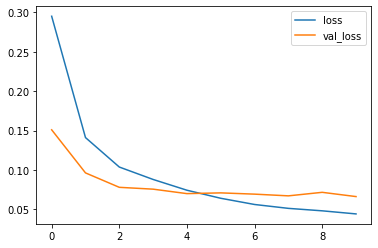

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

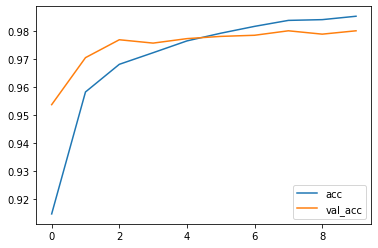

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 969    1    2    0    1    1    4    1    1    0]
 [   0 1123    3    2    0    1    2    0    4    0]
 [   3    0 1012    3    1    0    2    6    4    1]
 [   0    0    2  999    0    2    0    4    2    1]
 [   0    0    1    0  972    0    5    0    1    3]
 [   2    0    0   12    2  870    1    1    3    1]
 [   4    3    2    1    2    5  938    0    3    0]
 [   1    3    6    5    4    1    0 1000    3    5]
 [   2    0    4    8    7    5    1    3  938    6]
 [   0    3    0    5   12    4    1    2    1  981]]


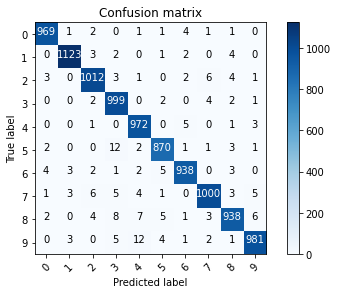

In [16]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

Text(0.5, 1.0, 'True label 9 Predicted: 3')

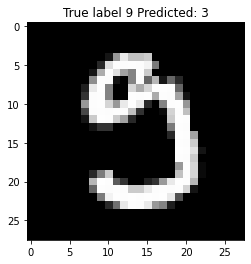

In [22]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label %s Predicted: %s' % (y_test[i], p_test[i]))